In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys, os
import torch
from itertools import product
from tqdm import tqdm
import pickle

from typing import Callable
from PIL import Image

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
# sys.path.append(os.path.join(os.getcwd(), '../sympde/viz'))

from misc.viz import imshow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1D Sine experiment

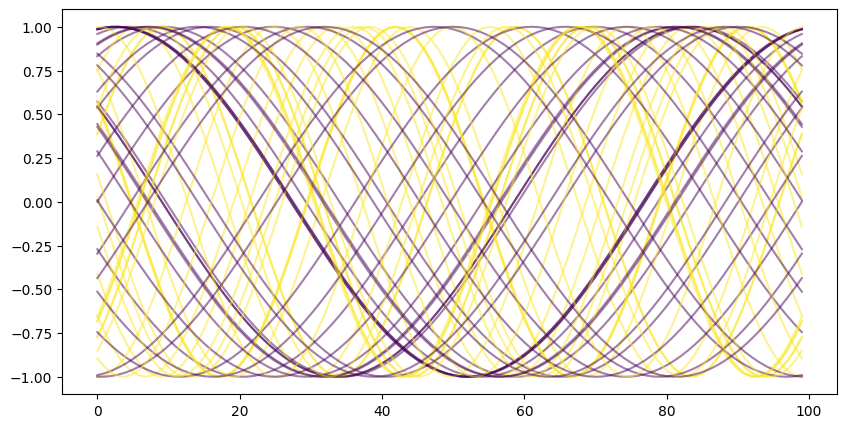

In [16]:
data_kwargs = {
    'space_length': 7,
    'noise_std': 0.5,
    'y_low': 1,
    'y_high': 3,
}

data_kwargs = {
    'space_length': 100,
    'noise_std': 0.,
    'y_low': 1,
    'y_high': 3,
}

outs = create_flat(N = 50, **data_kwargs)
x, y = outs['x'], outs['y']

plot_flat(x, y)

# save_splits(
#     create_sample_func=create_flat,
#     data_kwargs = data_kwargs,
#     data_dir = '../data/flat/',
# )   

## 2D Flower

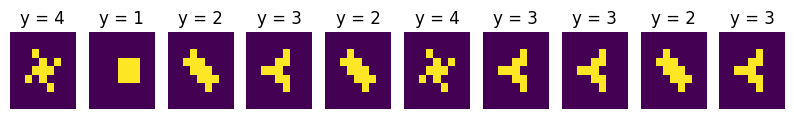

In [11]:
space_length = 9
out = create_flower(N=10, space_length=space_length**2, noise_std=0., y_low=1, y_high=5)
x, y, centers = out['x'], out['y'], out['centers']
x = x.reshape(-1, space_length, space_length)
plot_flower(x=x, y=y)

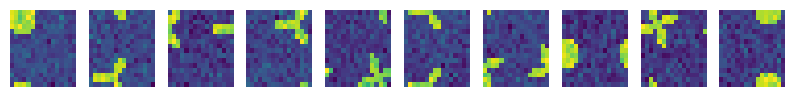

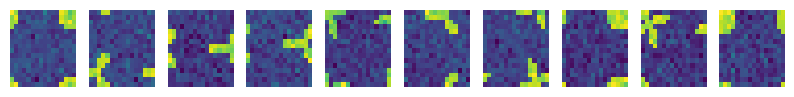

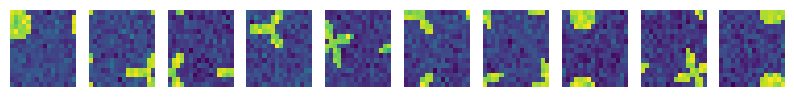

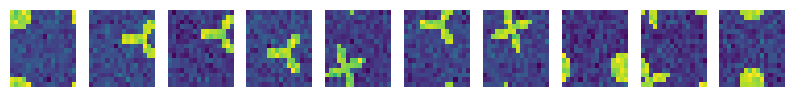

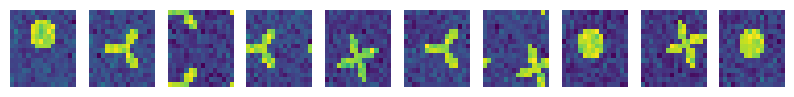

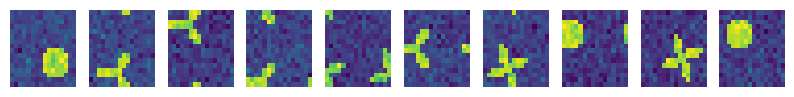

In [34]:

space_length = 16
out = create_flower(N=10, space_length=space_length**2, noise_std=0.1, y_low=1, y_high=5)
x, y, centers = out['x'], out['y'], out['centers']
x = x.reshape(-1, space_length, space_length)

plot_flower(x)

transform  = Transform()

x_new, center_new = torch.from_numpy(x), torch.from_numpy(centers)
for _ in range(5):
    epsilons = torch.randn(x_new.shape[0], 4)
    x_new = x_new.reshape(-1, space_length**2)
    x_new, center_new = transform(x_new, center_new, epsilons, transform_individual_bool=True)
    x_new = x_new.reshape(-1, space_length, space_length)
    plot_flower(x_new)

In [24]:
N_plot = 10

data_kwargs = {
    'space_length': 8,
    'noise_std': 0.1,
    'y_low': 1,
    'y_high': 6,
}

x       = np.load(os.path.join('../data/flower/train', f"x_space_length={data_kwargs['space_length']**2}_noise_std={data_kwargs['noise_std']}_y_low={data_kwargs['y_low']}_y_high={data_kwargs['y_high']}.npy"))
centers = np.load(os.path.join('../data/flower/train', f"centers_space_length={data_kwargs['space_length']**2}_noise_std={data_kwargs['noise_std']}_y_low={data_kwargs['y_low']}_y_high={data_kwargs['y_high']}.npy"))
y       = np.load(os.path.join('../data/flower/train', f"y_space_length={data_kwargs['space_length']**2}_noise_std={data_kwargs['noise_std']}_y_low={data_kwargs['y_low']}_y_high={data_kwargs['y_high']}.npy"))

x = x[:N_plot].reshape(N_plot, data_kwargs['space_length'], data_kwargs['space_length'])
y = y[:N_plot]

plot_flower(x, y = y, l = 1.5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/flower/train/x_space_length=64_noise_std=0.1_y_low=1_y_high=6.npy'